## Holiday Package Prediction

Author: **Ali Raza** \
Date: **2025-07-31** \
Project Type: **Mock Project** \
Email: <sahilr21727@gmail.com>


## 1- Problem Statement
Using historical data on previous package purchases, the objective is to build a binary classification model that can forecast whether customers are likely to purchase a newly launched holiday package 

## 2- Data Collection
Dataset is available on kaggle.


In [54]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [55]:
df = pd.read_csv("Travel.csv")

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## 3- Data Cleaning

### Handling Missing Values

1. Handling Missing Values
2. Handling Duplicates
3. Check Data Types
4. Understand the Dataset

In [57]:

## Checking missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [58]:
## Checking all the categorical features to understand wether the
## data containes any mistakes or not
print(df['Gender'].value_counts())
print(df['MaritalStatus'].value_counts())

## perform the same operation on other categories as well

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


In [59]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [60]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [61]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [62]:
## Checking the Missing values
## these are the Features with nan values

## [expression for item in iterable if condition]

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
print(features_with_na)

for i in features_with_na:
    print(i)

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Age
TypeofContact
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfChildrenVisiting
MonthlyIncome


In [63]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 2), '% missing values')

Age 4.62 % missing values
TypeofContact 0.51 % missing values
DurationOfPitch 5.14 % missing values
NumberOfFollowups 0.92 % missing values
PreferredPropertyStar 0.53 % missing values
NumberOfTrips 2.86 % missing values
NumberOfChildrenVisiting 1.35 % missing values
MonthlyIncome 4.77 % missing values


In [64]:
## basic stats on numerical columns

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [65]:
## Getting all the Numeric features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

## getting all the Categorical features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(num_features)
print(cat_features)
print('Number of numeric features', len(num_features))
print('Number of Categorical Features', len(cat_features))

['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Number of numeric features 14
Number of Categorical Features 6


In [66]:
## Discrete Features 

discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print(discrete_features)

## Continuous Features
continuous_features = [feature for feature in num_features if len(df[feature].unique())>25]

print('Number of Discrete features', len(discrete_features))
print('Number of Continuous features', len(continuous_features))

['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
Number of Discrete features 10
Number of Continuous features 4


### Imputing Null values

1. Impute Median value for Age column
2. Impute Mode for Type of Contact
3. Impute Median for Duration of Pitch
4. Impute Mode for Number of Followups as it is discrete feature
5. Impute Mode for Preffered Property Star
6. Impute Median for Number of trips
7. Impute Mode for Number of Children Visiting
8. Impute Median for Monthly Income 

In [67]:
df.head()
df.Age.fillna(df.Age.median(), inplace=True)

print(df.Age.isnull().sum())

0


In [68]:
df.TypeofContact.mode()[0]

'Self Enquiry'

In [69]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace= True)
print(df.TypeofContact.isnull().sum())

0


In [70]:
## Repeating the same procedure for all the Nan containing features

df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace = True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


print(df.isnull().sum())

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


In [71]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [72]:
df.drop('CustomerID', inplace=True, axis=1)

df.head()


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [73]:
## Creating new columns and removing unncessary columns

df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

df.drop(columns= ['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace=True, axis= 1)

df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [74]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## 4- Train Test Splitting & Model Training

In [75]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'], axis=1)  # Act as input
y = df['ProdTaken'] # Act as output

X.head()
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [76]:
y.head()
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((3910, 17), (978, 17))

In [78]:
print(y_test)
y_test.shape

144     0
79      0
2098    0
4738    0
2858    1
       ..
2908    0
2059    1
4872    1
843     0
2572    0
Name: ProdTaken, Length: 978, dtype: int64


(978,)

In [79]:
## Creating Column Transformer

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [80]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [81]:
print(X_train)

       Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
3995  36.0     Self Enquiry         1              7.0  Small Business   
2610  42.0     Self Enquiry         1             21.0        Salaried   
3083  50.0     Self Enquiry         1              7.0  Large Business   
3973  38.0     Self Enquiry         1              7.0        Salaried   
4044  44.0  Company Invited         1             35.0  Small Business   
...    ...              ...       ...              ...             ...   
4426  28.0     Self Enquiry         1             10.0  Small Business   
466   41.0     Self Enquiry         3              8.0        Salaried   
3092  38.0  Company Invited         3             28.0  Small Business   
3772  28.0     Self Enquiry         3             30.0  Small Business   
860   22.0  Company Invited         1              9.0        Salaried   

      Gender  NumberOfFollowups ProductPitched  PreferredPropertyStar  \
3995    Male                5.0       

In [82]:
## Applying transformation in training dataset ----> fit_transform

X_train = preprocessor.fit_transform(X_train)

print(X_train)

[[ 1.          0.          0.         ...  0.78296635 -0.38224537
  -0.77415132]
 [ 1.          0.          1.         ...  0.78296635 -0.4597992
   0.64361526]
 [ 1.          1.          0.         ...  0.78296635 -0.24519557
  -0.06526803]
 ...
 [ 0.          0.          0.         ...  0.78296635 -0.36057591
   0.64361526]
 [ 1.          0.          0.         ...  0.78296635 -0.25279888
   0.64361526]
 [ 0.          0.          1.         ... -1.2771941  -1.08251091
  -1.48303461]]


In [83]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [84]:
## Apply transformation in test data using ----> transform

X_test = preprocessor.transform(X_test)

In [85]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,-0.725271,1.511598,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.142519,0.282777,1.771041,-0.674182,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.056532,1.284279,-0.725271,-0.674182,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.287333,-2.721728,-0.725271,-0.674182,-0.632399,1.408395,0.782966,-0.228278,-0.774151


## 5- Random Forest Classifier Training

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Model training

    ## Making Predictions
    y_train_pred  = model.predict(X_train)  #give our own data to check prediction
    y_test_pred = model.predict(X_test)        # give test data to make prediction

    ## Training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## Test Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average= 'weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('='*35)

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logistic Regression
Model Performance for Training Set
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- ROC AUC Score: 0.6368
Model Performance for Test set
- Accuracy: 0.8364
- F1 score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- ROC AUC Score: 0.6307


Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
Model Performance for Test set
- Accuracy: 0.9213
- F1 score: 0.9205
- Precision: 0.8132
- Recall: 0.7749
- ROC AUC Score: 0.8658


Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
Model Performance for Test set
- Accuracy: 0.9315
- F1 score: 0.9260
- Precision: 0.9844
- Recall: 0.6597
- ROC AUC Score: 0.8286




In [88]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [89]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(3910,))

In [90]:
## Hyperparameter tuning

rf_params = {
    "max_depth": [5,8,15,None,10],
    "max_features": [5,7,"auto",8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

In [91]:
## Models list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params)
]

In [92]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f'---------------- Best Params for {model_name} ----------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF ----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [93]:
models = {

    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2,
                                            max_features=8, max_depth=None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Model training

    ## Making Predictions
    y_train_pred  = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## Test Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average= 'weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('-'*35)

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test set
- Accuracy: 0.9366
- F1 score: 0.9326
- Precision: 0.9640
- Recall: 0.7016
- ROC AUC Score: 0.8476




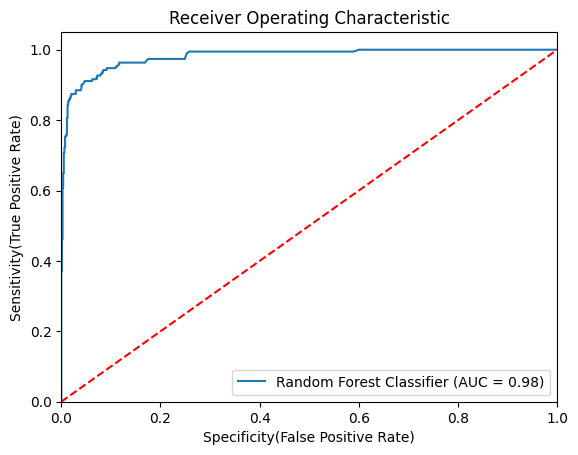

In [94]:
## Plotting the ROC AUC Curve

from sklearn.metrics import roc_auc_score, roc_curve

## ADD the models to the list that you want to view on the ROC plot

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators=1000, min_samples_split=2,
                                            max_features=8, max_depth=None),
        'auc': 0.9366


    }
]

## create loop through all models

for algo in auc_models:
    model = algo['model']  # select the model
    model.fit(X_train, y_train)  # train the model

    # Compute false positive rate and true positive rate
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calculate and plot ROC AUC
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")


# for algo in auc_models:
   # model = algo['model'] ## select the model
   # model.fit(X_train, y_train) ## train the model
    ## Compute false positive rate and true positive rate
   # fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    ## Calculate area under the curve to display on the plot

    # plt.plot(fpr, tpr,label= '% ROC (area = %0.2f)' % (algo['label']))
    # auc = roc_auc_score(y_test, y_scores)
    #plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")



## Custom settings for the plot

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
 
